### Importing Libraries

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading Dataset

In [2]:
df = pd.read_csv("Q1_data.csv")
df.head()

,Unnamed: 0,symbol,name,time_stamp,time_high,time_low,open,close,high,low,market_cap,volume
0,0,BTC,Bitcoin,2023-05-17T23:59:59.999Z,2023-05-17T20:09:00.000Z,2023-05-17T14:03:00.000Z,27035.470130,27398.802028,27465.927904,26600.144844,5.308901e+11,1.514001e+10
1,1,BTC,Bitcoin,2023-05-13T23:59:59.999Z,2023-05-13T18:50:00.000Z,2023-05-13T00:32:00.000Z,26807.769044,26784.078561,27030.482960,26710.873803,5.188737e+11,9.999172e+09
2,2,BTC,Bitcoin,2023-03-08T23:59:59.999Z,2023-03-08T00:23:00.000Z,2023-03-08T23:43:00.000Z,22216.442321,21718.079830,22268.896252,21708.050506,4.194214e+11,2.253658e+10
3,3,BTC,Bitcoin,2023-02-21T23:59:59.999Z,2023-02-21T08:30:00.000Z,2023-02-21T22:06:00.000Z,24833.048914,24436.354485,25126.851686,24200.364116,4.715777e+11,3.125210e+10
4,4,BTC,Bitcoin,2022-10-15T23:59:59.999Z,2022-10-15T03:59:00.000Z,2022-10-15T23:04:00.000Z,19185.437304,19067.635082,19212.541608,19019.250125,3.657224e+11,1.619224e+10


In [3]:
df = df.drop(columns=['Unnamed: 0'])
df.symbol.unique()

array(['BTC', 'BNB', 'ETH', 'USDT'], dtype=object)

### Market Cap vs. Volume Scatter Plot

In [4]:
# Create a scatter plot
fig = px.scatter(df, x='market_cap', y='volume', color='symbol',
                 labels={'market_cap': 'Market Cap', 'volume': 'Volume'},
                 title='Market Cap vs. Volume',
                 log_y=True
                )
fig.show()

In [5]:
symbols_to_plot = ['BTC', 'BNB', 'ETH', 'USDT']

# Create a separate scatter plot for each coin
for symbol in symbols_to_plot:
    coin_data = df[df['symbol'] == symbol]

    fig = px.scatter(coin_data, x='market_cap', y='volume',
                     labels={'market_cap': 'Market Cap', 'volume': 'Volume'},
                     title=f'{symbol} Market Cap vs. Volume',
                     log_y=True  # Use a logarithmic scale for the y-axis (volume)
                    )
    fig.show()

## Section 1:

### K-Means

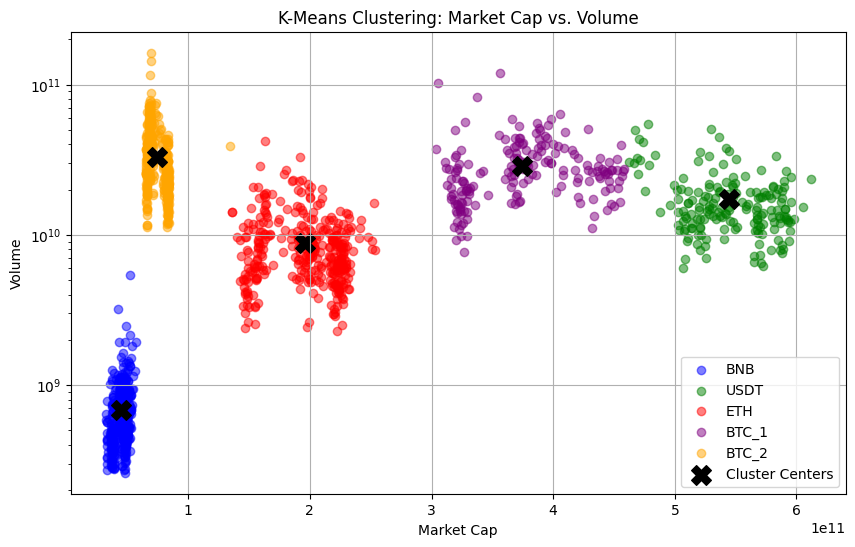

In [6]:
X = df[['market_cap', 'volume']]

n_clusters = 5

# Create a KMeans instance and fit the data
kmeans = KMeans(n_clusters=n_clusters)
df['cluster'] = kmeans.fit_predict(X)

custom_cluster_names = ['BNB', 'USDT', 'ETH', 'BTC_1', 'BTC_2']

# Plot the scatter plot with custom cluster assignments and cluster centers
plt.figure(figsize=(10, 6))

colors = ['blue', 'green', 'red', 'purple', 'orange']

for cluster in range(n_clusters):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['market_cap'], cluster_data['volume'], label=custom_cluster_names[cluster], c=colors[cluster], alpha=0.5)

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=200, c='black', label='Cluster Centers')
plt.title('K-Means Clustering: Market Cap vs. Volume')
plt.xlabel('Market Cap')
plt.ylabel('Volume')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

In [7]:
fig = px.scatter(df, x='market_cap', y='volume', color='cluster',
                 labels={'market_cap': 'Market Cap', 'volume': 'Volume'},
                 title='K-Means Clustering: Market Cap vs. Volume',
                 log_y=True,  # Use a logarithmic scale for the y-axis (volume)
                 color_discrete_sequence=colors,  # Assign cluster colors
                )

# Add cluster centers to the plot
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['market_cap', 'volume'])
fig.add_scatter(x=cluster_centers['market_cap'], y=cluster_centers['volume'], mode='markers',
                marker=dict(color='black', size=10, symbol='x', line=dict(width=2)))
fig.show()

## Section 2:

### Optimal k (WCSS & Silhouette)

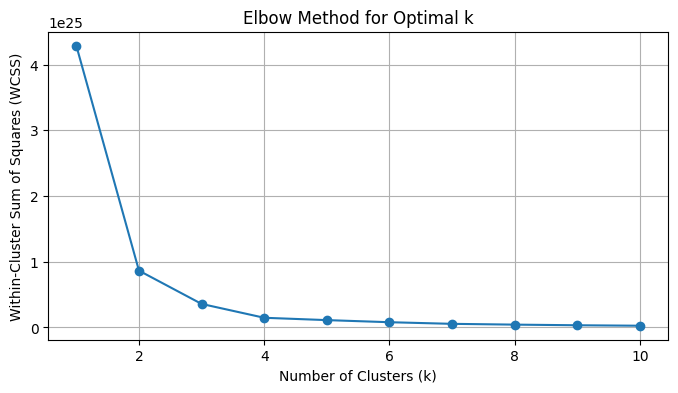

In [8]:
wcss = []

k_values = range(1, 11)

# Calculate WCSS for different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

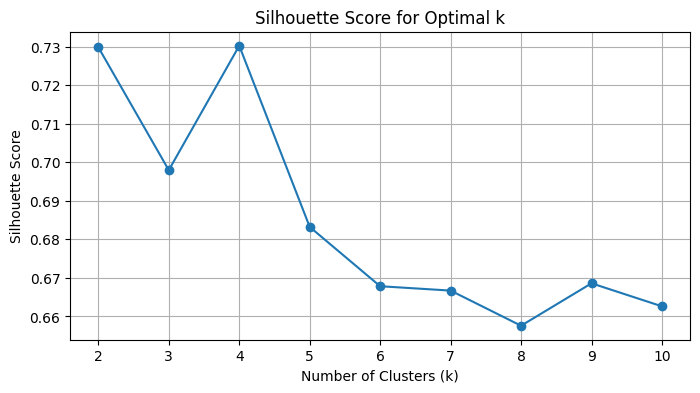

Optimal k (based on Silhouette Score): 4


In [9]:
k_values = range(2, 11)  # Choose a reasonable range

silhouette_scores = []

# Calculate Silhouette Score for different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Find the k with the highest Silhouette Score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k (based on Silhouette Score): {optimal_k}")

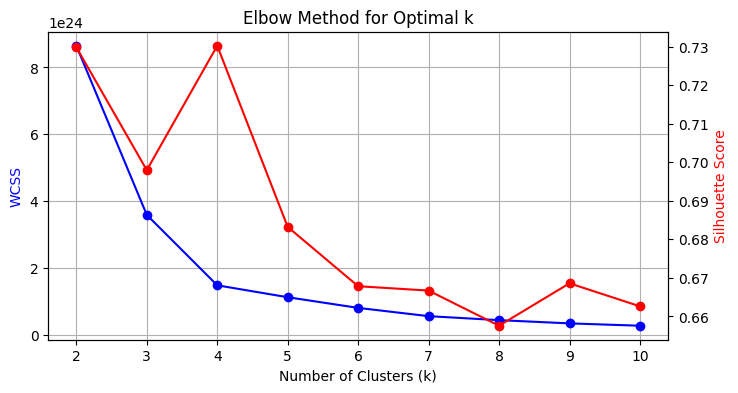

In [10]:
X = df[['market_cap', 'volume']]

wcss = []
silhouette_scores = []

k_values = range(2, 11)  # Start from 2 clusters

for k in k_values:
    # Calculate WCSS for different k values
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    # Calculate the silhouette score
    silhouette = 0
    if k > 1:
        silhouette = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette)

# Plot the Elbow Method and Silhouette Score
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot WCSS
ax1.plot(k_values, wcss, marker='o', linestyle='-', color='b')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('WCSS', color='b')
ax1.grid(True)

# Add a second y-axis for the silhouette score
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='r')
ax2.set_ylabel('Silhouette Score', color='r')

plt.title('Elbow Method for Optimal k')
plt.show()

##### So the optimal K is 4.

## Section 3:

### DBScan

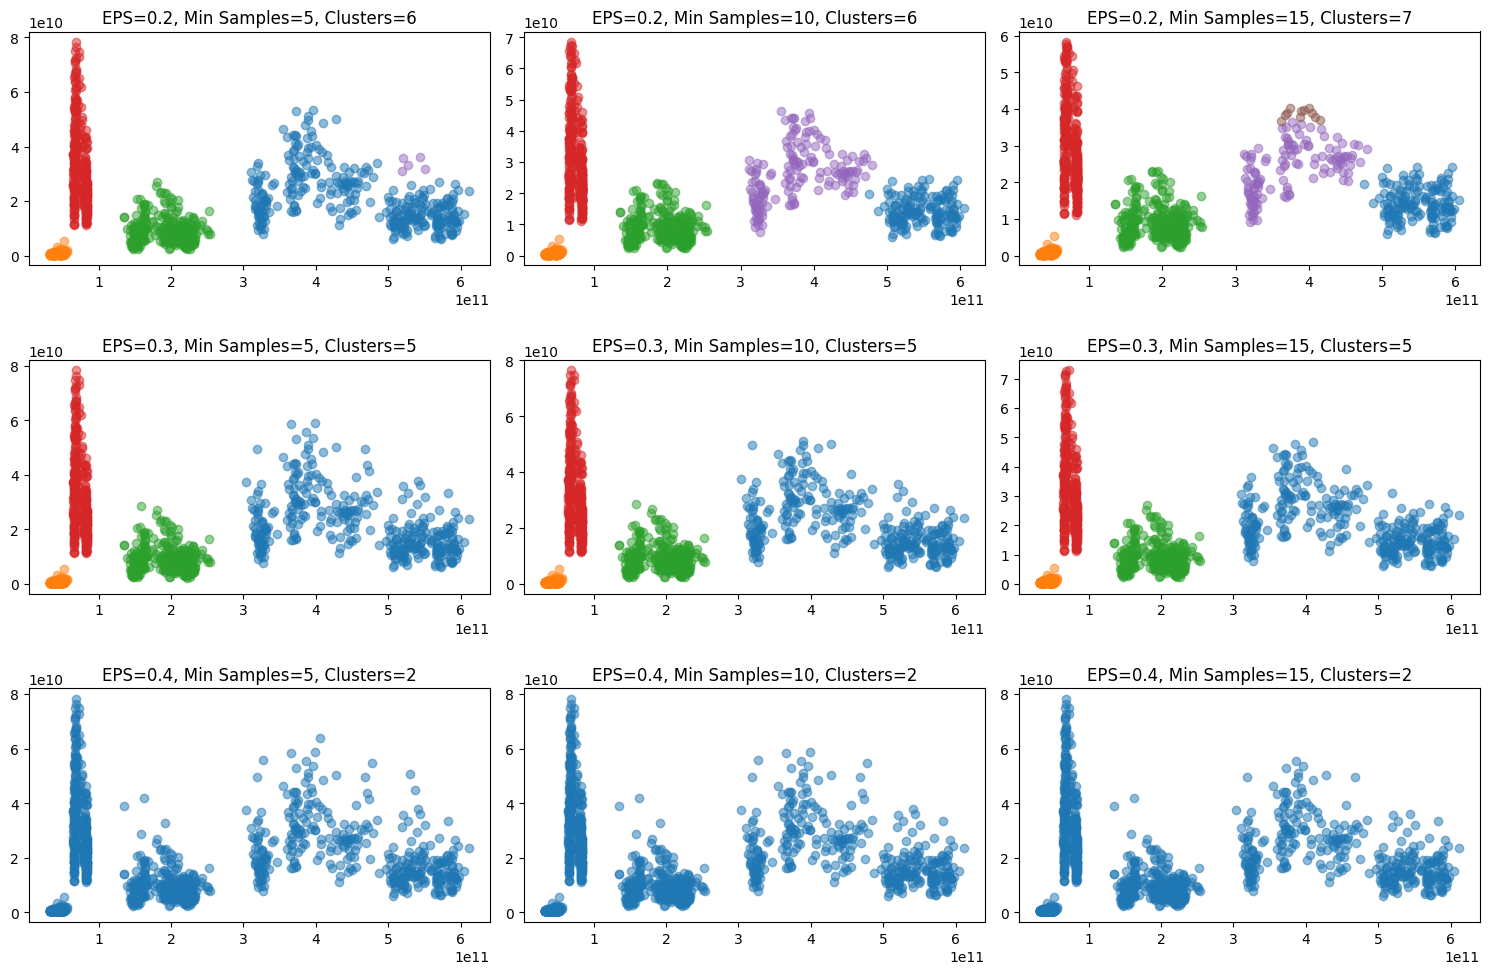

In [11]:
X = df[['market_cap', 'volume']]

# Standardize the data (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define hyperparameters for DBSCAN
eps_values = [0.2, 0.3, 0.4]
min_samples_values = [5, 10, 15]

fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 10))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Create a DBSCAN instance and fit the data
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        df['cluster'] = dbscan.fit_predict(X_scaled)
        
        # Count the number of clusters (excluding noise, labeled as -1)
        n_clusters = len(set(df['cluster'])) - (1 if -1 in df['cluster'] else 0)
        
        # Plot the scatter plot for the current hyperparameter values
        ax = axes[i][j]
        for cluster in range(n_clusters):
            cluster_data = df[df['cluster'] == cluster]
            ax.scatter(cluster_data['market_cap'], cluster_data['volume'], label=f'Cluster {cluster}', alpha=0.5)
        ax.set_title(f'EPS={eps}, Min Samples={min_samples}, Clusters={n_clusters}')

plt.tight_layout()
plt.show()